<a href="https://colab.research.google.com/github/Areefahnk/NNDL-18K41A0505/blob/main/Assignment_14_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

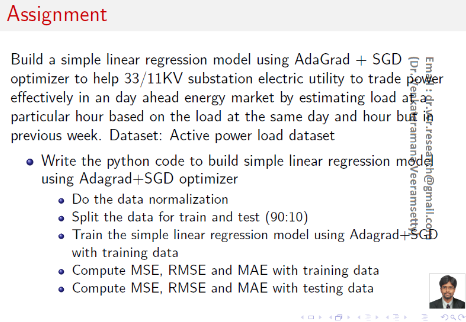

In [1]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Load_Data_in_kW.xlsx',header=None)
df.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


**Missing values**

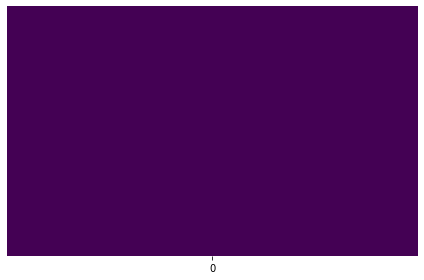

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

**Outliers**

In [3]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
#print(z)

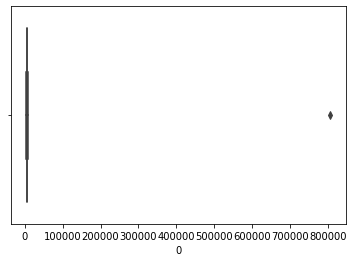

In [4]:
sns.boxplot(x=df[0])

In [5]:
#Filtering the outliers

q = df[0].quantile(0.99)
df[df[0] < q]
q_low = df[0].quantile(0.01)
q_hi  = df[0].quantile(0.99)

df_filtered = df[(df[0] < q_hi) & (df[0] > q_low)]
df_filtered.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


**Confirm outliers**

In [6]:
print(len(df))
print(len(df_filtered))
if(len(df) == len(df_filtered)):
    print('Hence there are No outliners')
else:
  df = df_filtered.copy()
  print("There are outliers. SO consider only filtered data")

2184
2140
There are outliers. SO consider only filtered data


In [7]:
len(df)

2140

**Normalization**

In [8]:
data_n = df.copy()
data_n = (data_n - data_n.min())/(data_n.max() - data_n.min())
data_n.head()

,0
0,0.372950
1,0.254941
2,0.235273
3,0.273574
4,0.299162


**Splitting of Dataset**

In [11]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data_n,test_size=0.1)

In [12]:
x1 = []
y1 = []
for i in range(len(train_data.iloc[:,0])-24):
    x1.append(train_data.iloc[i,0])
    y1.append(train_data.iloc[i+24,0])

**ADAGRAD + SGD**

In [14]:
import sympy as sym
from sympy import *
import random

mi=1
ci=-1
learning_rate=0.1
epochs=5
gama=0.9
iter=1
sample=1
Gm = Gc = 0 #sum of squares of gradient
ns = len(x1) #number of samples in training dataset
ep = 10**(-8)

while iter<=epochs:
  print('ITERATION {}'.format(iter))
  sample = 1
  while sample<=ns:
    print("Sample {}".format(sample))
    #step 4: Error function for Gradient descent
    #declare the variables that you will be using in the error function
    x=sym.Symbol('x')
    y=sym.Symbol('y')
    m=sym.Symbol('m')
    c=sym.Symbol('c')
    E=(0.5)*(y-m*x-c)**2  #ERROR FUNCTION


    derivE_m=sym.diff(E,m) #differentiation of E wrto m
    derivE_c=sym.diff(E,c)  #differentiate E wrto c
    #print(derivE_m)
    #print(derivE_c)
    #print('after subs m and c')
    #print('in derivE_m')
    derivE_m = derivE_m.subs(m, mi) 
    derivE_m = derivE_m.subs(c, ci)

    
    derivE_m = derivE_m.subs(x,x1[sample-1])
    derivE_m = derivE_m.subs(y,y1[sample-1])

    #print(derivE_m)
    #print('in derivE_c')
    derivE_c = derivE_c.subs(m, mi) 
    derivE_c = derivE_c.subs(c, ci)
    derivE_c = derivE_c.subs(x,x1[sample-1])
    derivE_c = derivE_c.subs(y,y1[sample-1])

    gm = derivE_m
    gc = derivE_c

    #step 5 
    Gm = Gm + (gm**2)
    Gc = Gc + (gc**2)

    #step 6 - change in model params
    delta_m = (-1.0)*(learning_rate/(Gm+ep)**(0.5))*derivE_m
    delta_c = (-1.0)*(learning_rate/(Gc+ep)**(0.5))*derivE_c

    #step 6 update model params
    mi = mi+delta_m
    ci = ci+delta_c
    print(mi)
    print(ci)
    print('-----------------------------------')
    #step 7 increment sample
    sample = sample+1

  iter=iter+1
  
  

print("Local minima values of m and c are: ",mi,ci)

Streaming output truncated to the last 5000 lines.
0.00799782266957233
0.453186391992983
-----------------------------------
Sample 654
0.00841256851104533
0.454058481317924
-----------------------------------
Sample 655
0.00844241750393287
0.454461973980719
-----------------------------------
Sample 656
0.0100955900158874
0.456681851868187
-----------------------------------
Sample 657
0.00833559544612858
0.454650373141727
-----------------------------------
Sample 658
0.0101897912937270
0.456856312799718
-----------------------------------
Sample 659
0.0110331488567869
0.457388065612311
-----------------------------------
Sample 660
0.00977911578129625
0.456000107218240
-----------------------------------
Sample 661
0.00970978804142325
0.455958022181282
-----------------------------------
Sample 662
0.00862885899959739
0.454738810616671
-----------------------------------
Sample 663
0.00863495599164719
0.454748827793123
-----------------------------------
Sample 664
0.007777805174494

**TRAINING ERROR**

In [15]:

y_train_pred = [i for i in x1]
for j in range(len(x1)):
    y_train_pred[j]=(mi*x1[j] + ci)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y1,y_train_pred)
mse

0.04427852178531413

**MSE, RMSE, MAE - Training data**

In [16]:

import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
mse = math.sqrt(mean_squared_error(y1, y_train_pred)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y1, y_train_pred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y1, y_train_pred)
print('Mean absolute error', mae)

Root mean square error 0.21042462257377137
Mean square error 0.04427852178531413
Mean absolute error 0.17206825713065968


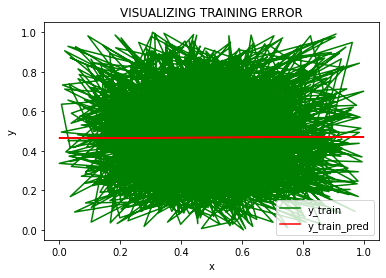

In [17]:
#Plot a line graph

import matplotlib.pyplot as plt
plt.plot(x1,y1,label='y_train',color='green')
plt.plot(x1,y_train_pred,label='y_train_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TRAINING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**Testing error**

In [18]:
x2 = []
y2 = []
for i in range(len(test_data.iloc[:,0])-24):
    x2.append(test_data.iloc[i,0])
    y2.append(test_data.iloc[i+24,0])

In [19]:

y_test_pred = [i for i in x2]
for j in range(len(x2)):
    y_test_pred[j]=(mi*x2[j] + ci)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y2,y_test_pred)
mse

0.04159132593516449

**MSE, RMSE, MAE - Testing Data**

In [20]:

import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
mse = math.sqrt(mean_squared_error(y2, y_test_pred)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y2, y_test_pred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y2, y_test_pred)
print('Mean absolute error', mae)

Root mean square error 0.20393951538425428
Mean square error 0.04159132593516449
Mean absolute error 0.16672125875278684


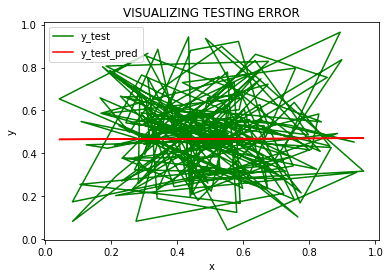

In [21]:
#Plot a line graph

import matplotlib.pyplot as plt
plt.plot(x2,y2,label='y_test',color='green')
plt.plot(x2,y_test_pred,label='y_test_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TESTING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**DEPLOY - Predict**

In [22]:
x_max = y_max= 8841.669480
x_min = y_min = 3377.919600
x =x1 = float(input("Enter the load of previous hour :"))
x = (x - x_min)/(x_max - x_min)
y = mi*x + ci
y = y*(y_max - y_min) + y_min
print(f"Predicted load at hour based on its previous hour is : {y}")

Enter the load of previous hour :9034.56
Predicted load at hour based on its previous hour is : 5950.23265931773
